# Solution Matplotlib // Fabby

### === Task 1 ===

1. Given $$y = 2x - 5 + 20 * noise$$, where noise is value between 0 and 1, generate x with 500 values between 0 and 1.  Then generate the corresponding y.

2. Plot the above with a scatter plot.

3. Plot a line $y = 2x - 5$ on top of this scatter plot.

In [18]:
#======== 1 ==========
import numpy as np
X = np.linspace(0,1,500)
noise = np.random.uniform(0,1,500)
y = 2 * X - 5 + (20 * noise)

print(X.shape)
print(noise.shape)
print(y.shape)

(500,)
(500,)
(500,)


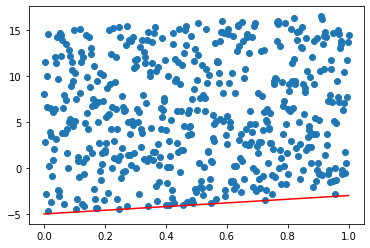

In [19]:
#======== 2 ==========
import matplotlib.pyplot as plt
plt.scatter(X,y)

#======== 3 ==========
y_line = (2 * X) - 5
plt.plot(X,y_line, c='r')

4. Given a function called sigmoid with $$y = 1 / (1 + np.exp(-x))$$, generate x as points from -5 to 5, then generate the corresponding y.  Plot the scatter graph.  Set the title to "Sigmoid" function, and set the xlabel to "x", and ylabel to "y"

Text(0.5, 1.0, 'Sigmoid')

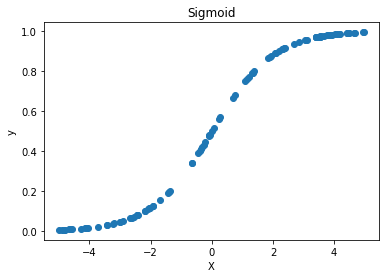

In [21]:
#======== 4 ==========
X = np.random.uniform(-5,5,100)
y = 1 / (1 + np.exp(-X))

plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sigmoid')

5. Go to sklearn.datasets and research about <code>make_classification</code> API.  Using this API, generate 500 samples, with n_features=10.  Then plot the scatter graph of the first two features with color equals to their class, marker = 'o', size = 25, and edgecolor = black.

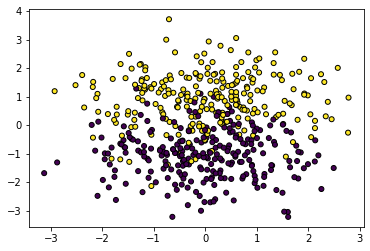

In [28]:
#======== 5 ==========
import sklearn
X, y = sklearn.datasets.make_classification(n_samples=500, n_features=10)
plt.scatter(X[:,0], X[:,1], c=y, marker='o',s = 25, edgecolor='black')

6. Load the iris datasets from sklearn.  Set X as the first two features, and y as the target.  Plot them in a scatter plot with color as their class.  Add some grid to the plot.

(150, 4)
(150,)


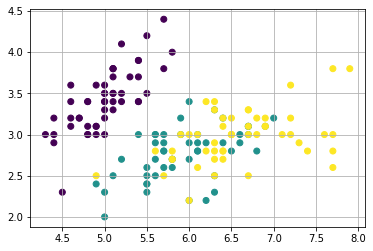

In [35]:
#======== 6 ==========
X, y = sklearn.datasets.load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()

7. I don't remember how do I get this plot.  Do you mind to reconstruct the following plot for me?  What I remember is that the dataset looks like this:

<img src = "../figures/exercise.png">





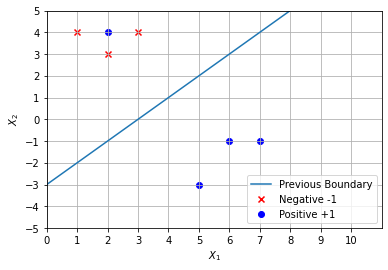

In [69]:
#======== 7 ==========
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3],[2,4]])
y_pos = np.array([1,1,1,1])
x1 = np.linspace(-10,10)
y_line = x1 - 3

plt.scatter(x_neg[:,0],x_neg[:,1],marker='x',c='r',label='Negative -1')
plt.scatter(x_pos[:,0],x_pos[:,1],c='b',label='Positive +1')
plt.plot(x1,y_line,label = 'Previous Boundary')
plt.xticks(np.arange(0,11))
plt.yticks(np.arange(-5,6))
plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')
plt.axis((0,11,-5,5))
plt.legend(loc='lower right')
plt.grid()
plt.show()

8. Given this data

<code>
    X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0, return_centers=True)
    plt.scatter(X[:, 0], X[:, 1], s=50);
</code>

Plot four big circles roughly on their centers.  Set the transparency of these circles to be around 0.5, their size to be 200, and their color to be black.   Look something like this:

<img src = "../figures/exercise2.png">

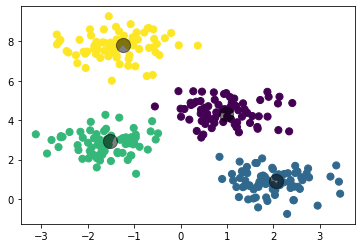

In [81]:
#======== 8 ==========
X, y_true, centers = sklearn.datasets.make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0, return_centers=True)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true)
plt.scatter(centers[:,0],centers[:,1], s = 200, c='black', marker='o', alpha=0.5)

### === Task 2 ===

1. Load the iris data, set the first two columns as X, and set the y as target

2. Then <code>from sklearn import svm</code>.  This will load a classification machine learning algorithm called SVM (Support Vector Machines).  For now, we shall not discuss much what is it, but we just need to know it is for classification.

3. We shall let this algorithm find some patterns n our iris data, and hopefully and separate the class for us.  To do so, we do 

<code>model = svm.SVC(kernel='linear').fit(X, y)</code>

4. Then, before we can actually do some prediction, let's prepare some thing.  Let's find the mininum and maximum of each feature value, i.e., 

<code>
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
</code>

5. In order to plot the decision boundary, we need to use something called contour plot which is a 3D plot in 2D.  To use contourf, we need to provide three coordinates, x, y, z.  To get z, we need to find all the possible pairs of x and y, before we can get z.  Thus, let's perform all possible values from x and y using this code:

<code>
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
              np.arange(y_min, y_max, 0.2))
</code>

6. Print these xx, and yy.  What is the relationship of these values with x and y?  What is the role of 0.2?

7. We can now create Z by using this function

<code>
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
</code>

8. Research a bit, what is ravel()?, and what does predict() do?

9.  Plot the graph using

<code>
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
</code>

10. Why do we want to reshape Z to xx.shape?  What is cmap?

11. Plot the training points on top of the contour plot with

<code>
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
</code>

Set the graph xlim to xx.min() and xx.max(); ylim to yy.min() and yy.max().  Set the xlabel to "Sepal length", and ylabel to "Sepal width".  Finally, add xticks() and yticks(), and whatever title you like.

Finally, it should look like this:

<img src = "../figures/exercise3.png">

In [87]:
#======== 1 ==========
X, y = sklearn.datasets.load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

X = X[:,:2]
print(X.shape)

(150, 4)
(150,)
(150, 2)


In [88]:
#======== 2 ==========
from sklearn import svm

#======== 3 ==========
model = svm.SVC(kernel='linear').fit(X, y)

#======== 4 ==========
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

([<matplotlib.axis.XTick at 0x7f47a04f6040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

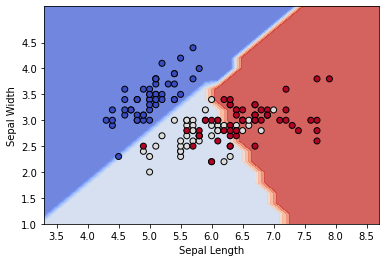

In [102]:
#======== 5 ==========
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
# print(xx)
# print(yy)
 
    
#======== 7 ==========
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])


#======== 9 ==========
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#======== 11 ==========
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.axis((xx.min(),xx.max(),yy.min(),yy.max()))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.yticks(np.arange(1,5,0.5))
plt.xticks(np.arange(3.5,9,0.5))